## Network in Network

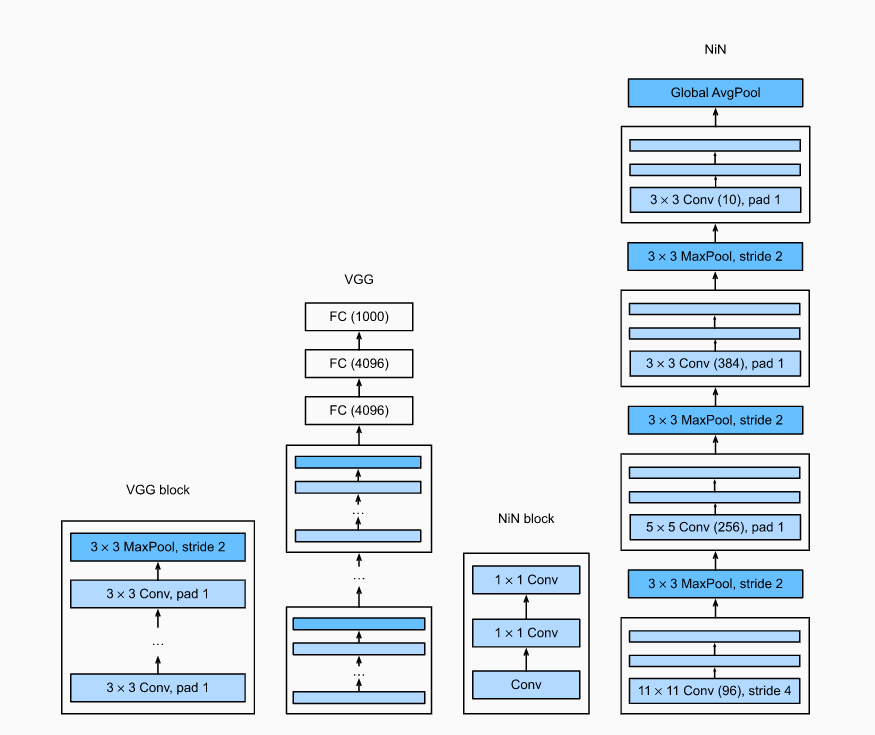

In [ ]:
import torch 
from torch import nn

In [ ]:
def nin_block(in_channels,out_channels,kernel_size,stride,padding):
  return nn.Sequential(
              nn.Conv2d(in_channels,out_channels,kernel_size,stride,padding),
              nn.ReLU(),
              nn.Conv2d(out_channels,out_channels,kernel_size=1),
              nn.ReLU(),
              nn.Conv2d(out_channels,out_channels,kernel_size=1),
              nn.ReLU(),
            )

In [ ]:
class NIN(nn.Module):
  def __init__(self):
    super(NIN,self).__init__()
    self.net = nn.Sequential(
        nin_block(3,96,kernel_size=11,stride=4,padding=0),
        nn.MaxPool2d(kernel_size=3,stride=2),
        nin_block(96,256,kernel_size=5,stride=1,padding=1),
        nn.MaxPool2d(kernel_size=3,stride=2),
        nin_block(256,384,kernel_size=3,stride=1,padding=1),
        nn.MaxPool2d(kernel_size=3,stride=2),
        nin_block(384,10,kernel_size=3,stride=1,padding=1),
        nn.AdaptiveAvgPool2d((1,1))
    )

  def forward(self,X):
    for layer in self.net:
      X = layer(X)
      print(layer.__class__.__name__,'output shape:\t',X.shape)
    return X

In [ ]:
X = torch.rand(size=(1, 3, 224, 224))
net = NIN()
net(X)

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 24, 24])
MaxPool2d output shape:	 torch.Size([1, 256, 11, 11])
Sequential output shape:	 torch.Size([1, 384, 11, 11])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])


tensor([[[[0.0000]],

         [[0.0000]],

         [[0.2559]],

         [[0.0000]],

         [[0.0000]],

         [[0.1898]],

         [[0.0975]],

         [[0.0000]],

         [[0.2273]],

         [[0.0000]]]], grad_fn=<MeanBackward1>)

## GoogleNet

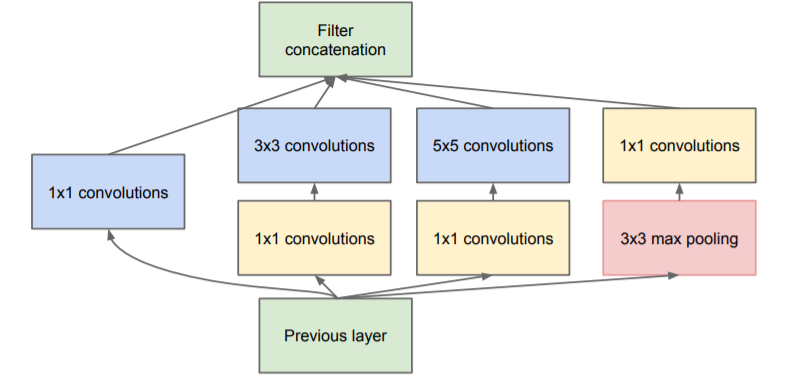

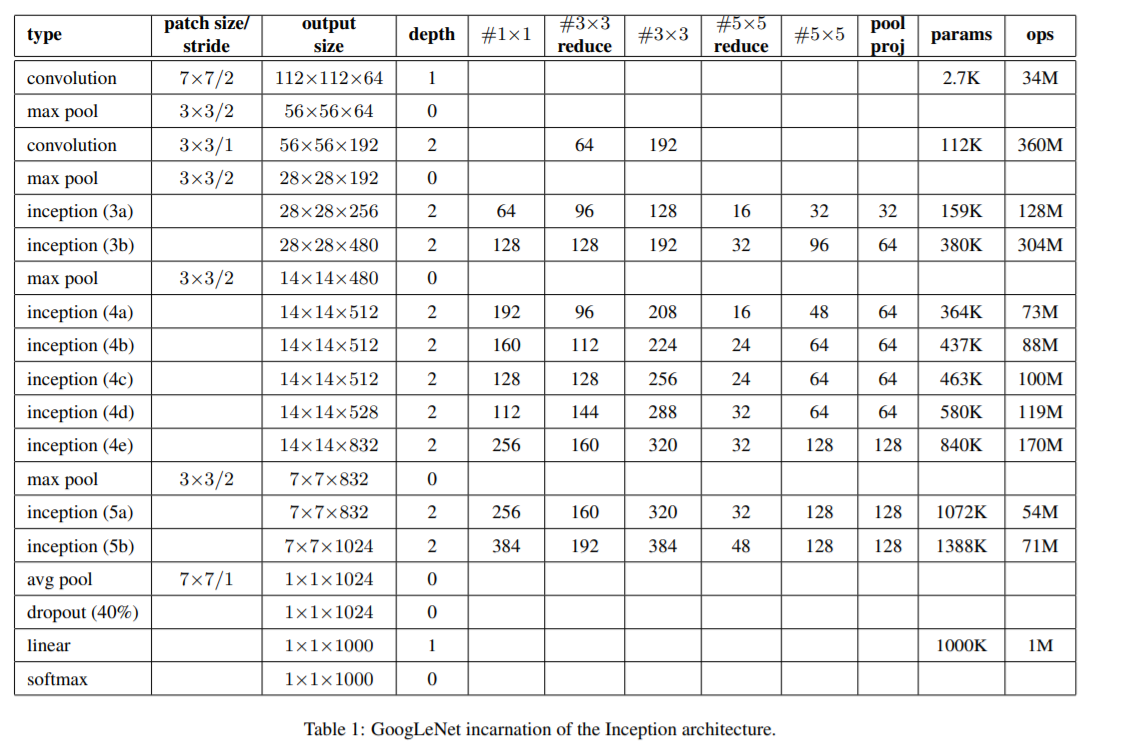

In [1]:
import torch 
import torch.nn as nn


In [8]:
class GoogleNet(nn.Module):
  def __init__(self,in_channels,classes):
    super(GoogleNet,self).__init__()
    self.model = nn.Sequential(
              nn.Conv2d(in_channels,out_channels=64,kernel_size=7,stride=2,padding=3),nn.ReLU(),
              nn.MaxPool2d(kernel_size=3,stride=2),
              nn.Conv2d(in_channels=64,out_channels=64,kernel_size=1),nn.ReLU(),
              nn.Conv2d(in_channels=64,out_channels=192,kernel_size=3,padding=1),nn.ReLU(),
              nn.MaxPool2d(kernel_size=3,stride=2),
              Inception(192,c1=64,c2=[96,128],c3=[16,32],c4=32),
              Inception(256,c1=128,c2=[128,192],c3=[32,96],c4=64),
              nn.MaxPool2d(kernel_size=3,stride=2,padding=1),
              Inception(480,c1=192,c2=[96,208],c3=[16,48],c4=64),
              Inception(512,c1=160,c2=[112,224],c3=[24,64],c4=64),
              Inception(512,c1=128,c2=[128,256],c3=[24,64],c4=64),
              Inception(512,c1=112,c2=[144,288],c3=[32,64],c4=64),
              Inception(528,c1=256,c2=[160,320],c3=[32,128],c4=128),
              nn.MaxPool2d(kernel_size=3,stride=2,padding=1),
              Inception(832,c1=256,c2=[160,320],c3=[32,128],c4=128),
              Inception(832,c1=384,c2=[192,384],c3=[48,128],c4=128),
              nn.AvgPool2d(kernel_size=7,stride=1),
              nn.Dropout(p=0.4),
              nn.Flatten(),
              nn.Linear(1024,classes),
              nn.Softmax(dim=1)
            )
  def forward(self,X:torch.tensor):
    print(self.training)
    for layer in self.model:
      X = layer(X)
      print(layer.__class__.__name__,'output shape:',X.shape)

In [9]:
class Inception(nn.Module):
  def __init__(self,in_channels,c1,c2,c3,c4):
    super(Inception,self).__init__()
    self.conv1 = nn.Conv2d(in_channels,c1,kernel_size = 1)
    self.conv2 = nn.Sequential(
                nn.Conv2d(in_channels,c2[0],kernel_size = 1),nn.ReLU(),
                nn.Conv2d(c2[0],c2[1],kernel_size=3,padding=1),nn.ReLU()
            )
    self.conv3 = nn.Sequential(
                nn.Conv2d(in_channels,c3[0],kernel_size=1),nn.ReLU(),
                nn.Conv2d(c3[0],c3[1],kernel_size=5, padding=2),nn.ReLU()
            )
    self.conv4 = nn.Sequential(
                nn.MaxPool2d(kernel_size=3,stride=1,padding=1),
                nn.Conv2d(in_channels,c4,kernel_size = 1),nn.ReLU(),
            )
  def forward(self,X):
    return torch.cat(
            (
            self.conv1(X),
            self.conv2(X),
            self.conv3(X),
            self.conv4(X),
            ),
            dim = 1
    )

In [12]:
X = torch.randn(size=(1,3,224,224))
net = GoogleNet(3,1000)
net(X)

True
Conv2d output shape: torch.Size([1, 64, 112, 112])
ReLU output shape: torch.Size([1, 64, 112, 112])
MaxPool2d output shape: torch.Size([1, 64, 55, 55])
Conv2d output shape: torch.Size([1, 64, 55, 55])
ReLU output shape: torch.Size([1, 64, 55, 55])
Conv2d output shape: torch.Size([1, 192, 55, 55])
ReLU output shape: torch.Size([1, 192, 55, 55])
MaxPool2d output shape: torch.Size([1, 192, 27, 27])
Inception output shape: torch.Size([1, 256, 27, 27])
Inception output shape: torch.Size([1, 480, 27, 27])
MaxPool2d output shape: torch.Size([1, 480, 14, 14])
Inception output shape: torch.Size([1, 512, 14, 14])
Inception output shape: torch.Size([1, 512, 14, 14])
Inception output shape: torch.Size([1, 512, 14, 14])
Inception output shape: torch.Size([1, 528, 14, 14])
Inception output shape: torch.Size([1, 832, 14, 14])
MaxPool2d output shape: torch.Size([1, 832, 7, 7])
Inception output shape: torch.Size([1, 832, 7, 7])
Inception output shape: torch.Size([1, 1024, 7, 7])
AvgPool2d output s

In [13]:
net.training

True

### 测试concate

In [ ]:
x = torch.randn(2,2, 3)
x

tensor([[[ 0.3559,  1.4155, -1.9865],
         [ 0.2443,  0.3496,  0.4190]],

        [[-0.7055, -1.1151,  1.8185],
         [ 0.0344,  2.2574, -0.8211]]])

In [ ]:
torch.cat((x, x, x), 0)

tensor([[[ 0.3559,  1.4155, -1.9865],
         [ 0.2443,  0.3496,  0.4190]],

        [[-0.7055, -1.1151,  1.8185],
         [ 0.0344,  2.2574, -0.8211]],

        [[ 0.3559,  1.4155, -1.9865],
         [ 0.2443,  0.3496,  0.4190]],

        [[-0.7055, -1.1151,  1.8185],
         [ 0.0344,  2.2574, -0.8211]],

        [[ 0.3559,  1.4155, -1.9865],
         [ 0.2443,  0.3496,  0.4190]],

        [[-0.7055, -1.1151,  1.8185],
         [ 0.0344,  2.2574, -0.8211]]])

In [ ]:
torch.cat((x, x, x), 1)

tensor([[[ 0.3559,  1.4155, -1.9865],
         [ 0.2443,  0.3496,  0.4190],
         [ 0.3559,  1.4155, -1.9865],
         [ 0.2443,  0.3496,  0.4190],
         [ 0.3559,  1.4155, -1.9865],
         [ 0.2443,  0.3496,  0.4190]],

        [[-0.7055, -1.1151,  1.8185],
         [ 0.0344,  2.2574, -0.8211],
         [-0.7055, -1.1151,  1.8185],
         [ 0.0344,  2.2574, -0.8211],
         [-0.7055, -1.1151,  1.8185],
         [ 0.0344,  2.2574, -0.8211]]])

## 测试Dropout

In [ ]:
m = nn.Dropout(p=0.2)
input = torch.randn(3,20, 16)
output = m(input)

In [ ]:
output == 0

tensor([[[False, False, False, False, False, False,  True, False, False, False,
          False,  True, False, False, False, False],
         [False, False, False, False, False, False, False, False, False, False,
           True, False, False, False,  True, False],
         [False,  True,  True, False, False, False, False, False, False, False,
           True, False, False, False, False,  True],
         [False, False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False],
         [False, False,  True, False, False, False,  True, False, False,  True,
           True,  True, False, False, False,  True],
         [False, False, False, False, False,  True, False, False,  True, False,
          False, False, False, False,  True, False],
         [False, False, False, False, False,  True, False, False,  True, False,
          False,  True,  True,  True,  True, False],
         [False,  True, False,  True, False, False, False, False, Fal

## 实现GoogleNet高级版本

In [ ]:
import warnings
from collections import namedtuple
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import Tensor
from .utils import load_state_dict_from_url
from typing import Optional, Tuple, List, Callable, Any


GoogLeNetOutputs = namedtuple('GoogLeNetOutputs', ['logits', 'aux_logits2', 'aux_logits1'])
GoogLeNetOutputs.__annotations__ = {'logits': Tensor, 'aux_logits2': Optional[Tensor],
                                    'aux_logits1': Optional[Tensor]}


def googlenet(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> "GoogLeNet":
    r"""GoogLeNet (Inception v1) model architecture from
    `"Going Deeper with Convolutions" <http://arxiv.org/abs/1409.4842>`_.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
        aux_logits (bool): If True, adds two auxiliary branches that can improve training.
            Default: *False* when pretrained is True otherwise *True*
        transform_input (bool): If True, preprocesses the input according to the method with which it
            was trained on ImageNet. Default: *False*
    """
    if pretrained:
        if 'transform_input' not in kwargs:
            kwargs['transform_input'] = True
        if 'aux_logits' not in kwargs:
            kwargs['aux_logits'] = False
        if kwargs['aux_logits']:
            warnings.warn('auxiliary heads in the pretrained googlenet model are NOT pretrained, '
                          'so make sure to train them')
        original_aux_logits = kwargs['aux_logits']
        kwargs['aux_logits'] = True
        kwargs['init_weights'] = False
        model = GoogLeNet(**kwargs)
        state_dict = load_state_dict_from_url(model_urls['googlenet'],
                                              progress=progress)
        model.load_state_dict(state_dict)
        if not original_aux_logits:
            model.aux_logits = False
            model.aux1 = None  # type: ignore[assignment]
            model.aux2 = None  # type: ignore[assignment]
        return model

    return GoogLeNet(**kwargs)


class GoogLeNet(nn.Module):
    __constants__ = ['aux_logits', 'transform_input']

    def __init__(
        self,
        num_classes: int = 1000,
        aux_logits: bool = True,
        transform_input: bool = False,
        init_weights: Optional[bool] = None,
        blocks: Optional[List[Callable[..., nn.Module]]] = None
    ) -> None:
        super(GoogLeNet, self).__init__()
        if blocks is None:
            blocks = [BasicConv2d, Inception, InceptionAux]
        if init_weights is None:
            warnings.warn('The default weight initialization of GoogleNet will be changed in future releases of '
                          'torchvision. If you wish to keep the old behavior (which leads to long initialization times'
                          ' due to scipy/scipy#11299), please set init_weights=True.', FutureWarning)
            init_weights = True
        assert len(blocks) == 3
        conv_block = blocks[0]
        inception_block = blocks[1]
        inception_aux_block = blocks[2]

        self.aux_logits = aux_logits
        self.transform_input = transform_input

        self.conv1 = conv_block(3, 64, kernel_size=7, stride=2, padding=3)
        self.maxpool1 = nn.MaxPool2d(3, stride=2, ceil_mode=True)
        self.conv2 = conv_block(64, 64, kernel_size=1)
        self.conv3 = conv_block(64, 192, kernel_size=3, padding=1)
        self.maxpool2 = nn.MaxPool2d(3, stride=2, ceil_mode=True)

        self.inception3a = inception_block(192, 64, 96, 128, 16, 32, 32)
        self.inception3b = inception_block(256, 128, 128, 192, 32, 96, 64)
        self.maxpool3 = nn.MaxPool2d(3, stride=2, ceil_mode=True)

        self.inception4a = inception_block(480, 192, 96, 208, 16, 48, 64)
        self.inception4b = inception_block(512, 160, 112, 224, 24, 64, 64)
        self.inception4c = inception_block(512, 128, 128, 256, 24, 64, 64)
        self.inception4d = inception_block(512, 112, 144, 288, 32, 64, 64)
        self.inception4e = inception_block(528, 256, 160, 320, 32, 128, 128)
        self.maxpool4 = nn.MaxPool2d(2, stride=2, ceil_mode=True)

        self.inception5a = inception_block(832, 256, 160, 320, 32, 128, 128)
        self.inception5b = inception_block(832, 384, 192, 384, 48, 128, 128)

        if aux_logits:
            self.aux1 = inception_aux_block(512, num_classes)
            self.aux2 = inception_aux_block(528, num_classes)
        else:
            self.aux1 = None  # type: ignore[assignment]
            self.aux2 = None  # type: ignore[assignment]

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(1024, num_classes)

        if init_weights:
            self._initialize_weights()

    def _initialize_weights(self) -> None:
        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                import scipy.stats as stats
                X = stats.truncnorm(-2, 2, scale=0.01)
                values = torch.as_tensor(X.rvs(m.weight.numel()), dtype=m.weight.dtype)
                values = values.view(m.weight.size())
                with torch.no_grad():
                    m.weight.copy_(values)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def _transform_input(self, x: Tensor) -> Tensor:
        if self.transform_input:
            x_ch0 = torch.unsqueeze(x[:, 0], 1) * (0.229 / 0.5) + (0.485 - 0.5) / 0.5
            x_ch1 = torch.unsqueeze(x[:, 1], 1) * (0.224 / 0.5) + (0.456 - 0.5) / 0.5
            x_ch2 = torch.unsqueeze(x[:, 2], 1) * (0.225 / 0.5) + (0.406 - 0.5) / 0.5
            x = torch.cat((x_ch0, x_ch1, x_ch2), 1)
        return x

    def _forward(self, x: Tensor) -> Tuple[Tensor, Optional[Tensor], Optional[Tensor]]:
        # N x 3 x 224 x 224
        x = self.conv1(x)
        # N x 64 x 112 x 112
        x = self.maxpool1(x)
        # N x 64 x 56 x 56
        x = self.conv2(x)
        # N x 64 x 56 x 56
        x = self.conv3(x)
        # N x 192 x 56 x 56
        x = self.maxpool2(x)

        # N x 192 x 28 x 28
        x = self.inception3a(x)
        # N x 256 x 28 x 28
        x = self.inception3b(x)
        # N x 480 x 28 x 28
        x = self.maxpool3(x)
        # N x 480 x 14 x 14
        x = self.inception4a(x)
        # N x 512 x 14 x 14
        aux1: Optional[Tensor] = None
        if self.aux1 is not None:
            if self.training:
                aux1 = self.aux1(x)

        x = self.inception4b(x)
        # N x 512 x 14 x 14
        x = self.inception4c(x)
        # N x 512 x 14 x 14
        x = self.inception4d(x)
        # N x 528 x 14 x 14
        aux2: Optional[Tensor] = None
        if self.aux2 is not None:
            if self.training:
                aux2 = self.aux2(x)

        x = self.inception4e(x)
        # N x 832 x 14 x 14
        x = self.maxpool4(x)
        # N x 832 x 7 x 7
        x = self.inception5a(x)
        # N x 832 x 7 x 7
        x = self.inception5b(x)
        # N x 1024 x 7 x 7

        x = self.avgpool(x)
        # N x 1024 x 1 x 1
        x = torch.flatten(x, 1)
        # N x 1024
        x = self.dropout(x)
        x = self.fc(x)
        # N x 1000 (num_classes)
        return x, aux2, aux1

    def eager_outputs(self, x, aux2, aux1):
        if self.training and self.aux_logits:
            return _GoogLeNetOutputs(x, aux2, aux1)
        else:
            return x   # type: ignore[return-value]

    def forward(self, x):
        x = self._transform_input(x)
        x, aux1, aux2 = self._forward(x)
        aux_defined = self.training and self.aux_logits
        if torch.jit.is_scripting():
            if not aux_defined:
                warnings.warn("Scripted GoogleNet always returns GoogleNetOutputs Tuple")
            return GoogLeNetOutputs(x, aux2, aux1)
        else:
            return self.eager_outputs(x, aux2, aux1)


class Inception(nn.Module):

    def __init__(
        self,
        in_channels: int,
        ch1x1: int,
        ch3x3red: int,
        ch3x3: int,
        ch5x5red: int,
        ch5x5: int,
        pool_proj: int,
        conv_block: Optional[Callable[..., nn.Module]] = None
    ) -> None:
        super(Inception, self).__init__()
        if conv_block is None:
            conv_block = BasicConv2d
        self.branch1 = conv_block(in_channels, ch1x1, kernel_size=1)

        self.branch2 = nn.Sequential(
            conv_block(in_channels, ch3x3red, kernel_size=1),
            conv_block(ch3x3red, ch3x3, kernel_size=3, padding=1)
        )

        self.branch3 = nn.Sequential(
            conv_block(in_channels, ch5x5red, kernel_size=1),
            # Here, kernel_size=3 instead of kernel_size=5 is a known bug.
            # Please see https://github.com/pytorch/vision/issues/906 for details.
            conv_block(ch5x5red, ch5x5, kernel_size=3, padding=1)
        )

        self.branch4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1, ceil_mode=True),
            conv_block(in_channels, pool_proj, kernel_size=1)
        )

    def _forward(self, x: Tensor) -> List[Tensor]:
        branch1 = self.branch1(x)
        branch2 = self.branch2(x)
        branch3 = self.branch3(x)
        branch4 = self.branch4(x)

        outputs = [branch1, branch2, branch3, branch4]
        return outputs

    def forward(self, x: Tensor) -> Tensor:
        outputs = self._forward(x)
        return torch.cat(outputs, 1)


class InceptionAux(nn.Module):

    def __init__(
        self,
        in_channels: int,
        num_classes: int,
        conv_block: Optional[Callable[..., nn.Module]] = None
    ) -> None:
        super(InceptionAux, self).__init__()
        if conv_block is None:
            conv_block = BasicConv2d
        self.conv = conv_block(in_channels, 128, kernel_size=1)

        self.fc1 = nn.Linear(2048, 1024)
        self.fc2 = nn.Linear(1024, num_classes)

    def forward(self, x: Tensor) -> Tensor:
        # aux1: N x 512 x 14 x 14, aux2: N x 528 x 14 x 14
        x = F.adaptive_avg_pool2d(x, (4, 4))
        # aux1: N x 512 x 4 x 4, aux2: N x 528 x 4 x 4
        x = self.conv(x)
        # N x 128 x 4 x 4
        x = torch.flatten(x, 1)
        # N x 2048
        x = F.relu(self.fc1(x), inplace=True)
        # N x 1024
        x = F.dropout(x, 0.7, training=self.training)
        # N x 1024
        x = self.fc2(x)
        # N x 1000 (num_classes)

        return x


class BasicConv2d(nn.Module):

    def __init__(
        self,
        in_channels: int,
        out_channels: int,
        **kwargs: Any
    ) -> None:
        super(BasicConv2d, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, bias=False, **kwargs)
        self.bn = nn.BatchNorm2d(out_channels, eps=0.001)

    def forward(self, x: Tensor) -> Tensor:
        x = self.conv(x)
        x = self.bn(x)
        return F.relu(x, inplace=True)